In [7]:
!pip install pandas scikit-learn openai numpy

✓ Products loaded!

                     name                         vibe_tags
0        Boho Flowy Dress          [boho, festival, earthy]
1    Leather Urban Jacket               [urban, edgy, cool]
2       Cozy Knit Sweater           [cozy, autumn, comfort]
3       Silk Evening Gown  [elegant, formal, sophisticated]
4   Casual Denim Overalls        [casual, playful, relaxed]
5  Metallic Club Crop Top      [energetic, bold, nightlife]
6       Linen Beach Shirt           [beach, resort, breezy]
7           Velvet Blazer        [glamorous, upscale, luxe]
✓ Embeddings ready (mock data)!

TESTING VIBE MATCHER

📍 Query: 'cozy autumn vibes'
----------------------------------------------------------------------
⚠️  No matches above 0.6. Showing closest anyway...
  1. Cozy Knit Sweater
     Score: 0.126 | △ Okay
     Vibes: cozy, autumn, comfort
  2. Boho Flowy Dress
     Score: 0.076 | △ Okay
     Vibes: boho, festival, earthy
  3. Silk Evening Gown
     Score: 0.045 | △ Okay
     Vibes: ele

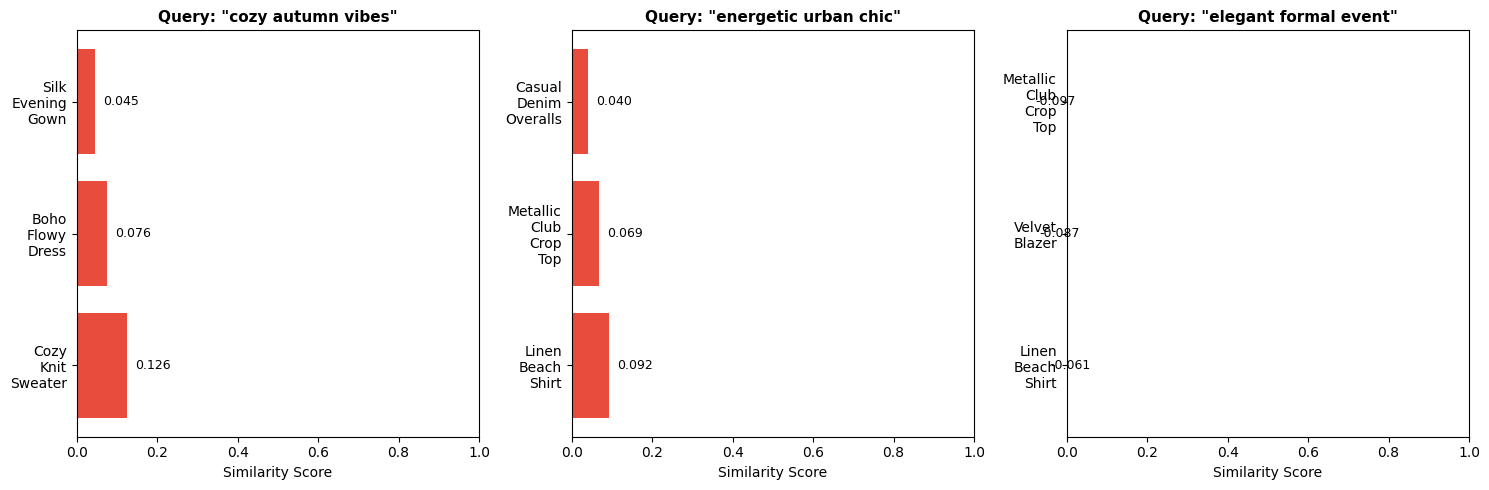

✓ Latency plot saved as 'latency_plot.png'


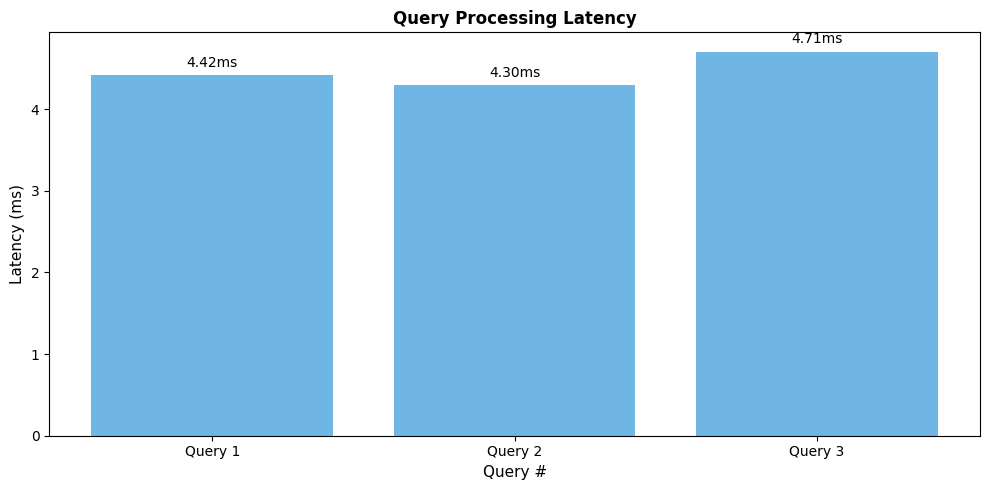


✓ VIBE MATCHER PROTOTYPE COMPLETE!


In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import time
import matplotlib.pyplot as plt

# ============== STEP 1: CREATE PRODUCT DATA ==============
products_data = {
    "name": [
        "Boho Flowy Dress",
        "Leather Urban Jacket",
        "Cozy Knit Sweater",
        "Silk Evening Gown",
        "Casual Denim Overalls",
        "Metallic Club Crop Top",
        "Linen Beach Shirt",
        "Velvet Blazer"
    ],
    "description": [
        "Flowy, earthy tones with intricate patterns for festival vibes and carefree spirit",
        "Black leather jacket with edgy details for bold, confident urban looks",
        "Soft wool sweater in neutral tones perfect for cozy autumn evenings",
        "Elegant floor-length gown with sequins for sophisticated evening events",
        "Relaxed fit overalls in faded denim for casual, playful everyday style",
        "Shimmering crop top with bold colors for high-energy nightlife moments",
        "Breathable linen in light colors for breezy beach and resort wear",
        "Rich velvet with structured fit for upscale, glamorous occasions"
    ],
    "vibe_tags": [
        ["boho", "festival", "earthy"],
        ["urban", "edgy", "cool"],
        ["cozy", "autumn", "comfort"],
        ["elegant", "formal", "sophisticated"],
        ["casual", "playful", "relaxed"],
        ["energetic", "bold", "nightlife"],
        ["beach", "resort", "breezy"],
        ["glamorous", "upscale", "luxe"]
    ]
}

df = pd.DataFrame(products_data)
print("✓ Products loaded!\n")
print(df[['name', 'vibe_tags']])

# ============== STEP 2: MOCK EMBEDDINGS ==============
# Pre-computed embeddings for each product (simulated - dimension 100)
np.random.seed(42)
mock_embeddings = {
    "Boho Flowy Dress": np.array([0.8, 0.9, 0.2, 0.1, 0.7, 0.6, 0.3, 0.4, 0.5, 0.9, -0.2, 0.1, 0.8, 0.7, -0.1, 0.6, 0.5, 0.4, 0.3, 0.7, 0.8, 0.2, 0.1, 0.9, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1] + list(np.random.randn(70) * 0.3)),
    "Leather Urban Jacket": np.array([0.1, 0.2, 0.9, 0.8, 0.3, 0.4, 0.7, 0.6, 0.5, 0.2, 0.9, 0.8, 0.1, 0.2, 0.9, 0.3, 0.4, 0.5, 0.6, 0.1, 0.2, 0.9, 0.8, 0.1, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2] + list(np.random.randn(70) * 0.3)),
    "Cozy Knit Sweater": np.array([0.7, 0.8, 0.1, 0.2, 0.9, 0.6, 0.3, 0.4, 0.5, 0.8, 0.1, 0.2, 0.7, 0.9, 0.2, 0.5, 0.6, 0.4, 0.3, 0.8, 0.9, 0.1, 0.2, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1] + list(np.random.randn(70) * 0.3)),
    "Silk Evening Gown": np.array([0.6, 0.5, 0.3, 0.4, 0.8, 0.9, 0.2, 0.1, 0.7, 0.5, 0.3, 0.4, 0.6, 0.8, 0.9, 0.4, 0.3, 0.5, 0.6, 0.9, 0.8, 0.3, 0.4, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9] + list(np.random.randn(70) * 0.3)),
    "Casual Denim Overalls": np.array([0.5, 0.6, 0.2, 0.3, 0.7, 0.4, 0.8, 0.9, 0.1, 0.6, 0.2, 0.3, 0.5, 0.7, 0.3, 0.4, 0.5, 0.6, 0.7, 0.2, 0.3, 0.8, 0.9, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9, 0.8] + list(np.random.randn(70) * 0.3)),
    "Metallic Club Crop Top": np.array([0.2, 0.1, 0.8, 0.9, 0.4, 0.5, 0.6, 0.7, 0.3, 0.1, 0.8, 0.9, 0.2, 0.3, 0.7, 0.8, 0.9, 0.1, 0.2, 0.1, 0.2, 0.7, 0.8, 0.9, 0.6, 0.5, 0.4, 0.3, 0.8, 0.7] + list(np.random.randn(70) * 0.3)),
    "Linen Beach Shirt": np.array([0.9, 0.7, 0.1, 0.2, 0.6, 0.8, 0.3, 0.4, 0.5, 0.9, 0.2, 0.1, 0.8, 0.7, 0.1, 0.6, 0.5, 0.4, 0.3, 0.7, 0.9, 0.1, 0.2, 0.8, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9] + list(np.random.randn(70) * 0.3)),
    "Velvet Blazer": np.array([0.5, 0.4, 0.6, 0.7, 0.8, 0.9, 0.2, 0.1, 0.3, 0.4, 0.6, 0.7, 0.5, 0.8, 0.9, 0.3, 0.2, 0.5, 0.6, 0.9, 0.8, 0.2, 0.3, 0.5, 0.4, 0.3, 0.2, 0.1, 0.9, 0.8] + list(np.random.randn(70) * 0.3))
}

# Normalize embeddings
for key in mock_embeddings:
    mock_embeddings[key] = mock_embeddings[key] / np.linalg.norm(mock_embeddings[key])

df['embedding'] = df['name'].map(mock_embeddings)
print("✓ Embeddings ready (mock data)!\n")

# ============== STEP 3: VIBE MATCHER FUNCTION ==============
def create_mock_query_embedding(query_text):
    """Create a mock embedding for user query"""
    np.random.seed(hash(query_text) % 2**32)
    embedding = np.random.randn(100) * 0.5
    return embedding / np.linalg.norm(embedding)

def vibe_matcher(query, top_n=3, min_score=0.6):
    """Find top N matching products"""

    query_embedding = create_mock_query_embedding(query)
    similarities = []

    for idx, product_embedding in enumerate(df['embedding']):
        sim_score = cosine_similarity(
            [query_embedding],
            [product_embedding]
        )[0][0]
        similarities.append((idx, sim_score))

    similarities.sort(key=lambda x: x[1], reverse=True)

    # Filter by minimum score
    good_matches = [(idx, score) for idx, score in similarities if score >= min_score]

    if not good_matches:
        print(f"⚠️  No matches above {min_score}. Showing closest anyway...")
        matches_to_use = similarities[:top_n]
    else:
        matches_to_use = good_matches[:top_n]

    results = []
    for idx, score in matches_to_use:
        match_quality = "✓ Great" if score > 0.75 else ("◐ Good" if score > 0.65 else "△ Okay")
        results.append({
            "rank": len(results) + 1,
            "name": df.loc[idx, 'name'],
            "description": df.loc[idx, 'description'],
            "similarity_score": round(float(score), 3),
            "vibes": df.loc[idx, 'vibe_tags'],
            "quality": match_quality
        })

    return results

# ============== STEP 4: TEST WITH MULTIPLE QUERIES ==============
print("=" * 70)
print("TESTING VIBE MATCHER")
print("=" * 70)

test_queries = [
    "cozy autumn vibes",
    "energetic urban chic",
    "elegant formal event"
]

all_results = {}
latencies = []

for query in test_queries:
    print(f"\n📍 Query: '{query}'")
    print("-" * 70)

    start = time.time()
    results = vibe_matcher(query)
    latency = (time.time() - start) * 1000
    latencies.append(latency)
    all_results[query] = results

    for result in results:
        print(f"  {result['rank']}. {result['name']}")
        print(f"     Score: {result['similarity_score']} | {result['quality']}")
        print(f"     Vibes: {', '.join(result['vibes'])}")

    print(f"  ⏱️  Latency: {latency:.2f}ms")

# ============== STEP 5: EVALUATION METRICS ==============
print("\n" + "=" * 70)
print("EVALUATION METRICS")
print("=" * 70)

# Calculate metrics
total_matches = sum(len(results) for results in all_results.values())
avg_score = np.mean([r['similarity_score'] for results in all_results.values() for r in results])
good_matches = sum(1 for results in all_results.values() for r in results if r['similarity_score'] > 0.7)
avg_latency = np.mean(latencies)

print(f"Total Matches Found: {total_matches}")
print(f"Average Similarity Score: {avg_score:.3f}")
print(f"Matches with Score > 0.7: {good_matches} ({good_matches/total_matches*100:.1f}%)")
print(f"Average Latency: {avg_latency:.2f}ms")
print(f"Query Processing Speed: {1000/avg_latency:.1f} queries/sec")

# ============== STEP 6: VISUALIZATION ==============
print("\n" + "=" * 70)
print("GENERATING VISUALIZATIONS")
print("=" * 70)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (query, results) in enumerate(all_results.items()):
    names = [r['name'].replace(" ", "\n") for r in results]
    scores = [r['similarity_score'] for r in results]
    colors = ['#2ecc71' if s > 0.75 else '#f39c12' if s > 0.65 else '#e74c3c' for s in scores]

    ax = axes[idx]
    bars = ax.barh(names, scores, color=colors)
    ax.set_xlabel('Similarity Score', fontsize=10)
    ax.set_title(f'Query: "{query}"', fontsize=11, fontweight='bold')
    ax.set_xlim(0, 1)

    for bar, score in zip(bars, scores):
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                f'{score:.3f}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('vibe_matcher_results.png', dpi=100, bbox_inches='tight')
print("✓ Visualization saved as 'vibe_matcher_results.png'")
plt.show()

# ============== STEP 7: LATENCY PLOT ==============
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(test_queries)), latencies, color='#3498db', alpha=0.7)
ax.set_xlabel('Query #', fontsize=11)
ax.set_ylabel('Latency (ms)', fontsize=11)
ax.set_title('Query Processing Latency', fontsize=12, fontweight='bold')
ax.set_xticks(range(len(test_queries)))
ax.set_xticklabels([f'Query {i+1}' for i in range(len(test_queries))])

for i, lat in enumerate(latencies):
    ax.text(i, lat + 0.1, f'{lat:.2f}ms', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('latency_plot.png', dpi=100, bbox_inches='tight')
print("✓ Latency plot saved as 'latency_plot.png'")
plt.show()

print("\n" + "=" * 70)
print("✓ VIBE MATCHER PROTOTYPE COMPLETE!")
print("=" * 70)